## Why regularize and its types (Regularization: Concept and methods: Video 69)

**Why Regularization?**

* penalizes memorization (over-learning examples)
* helps the model generalize to unseen examples
* changes the representations of learning (either more sparse or more distributed depending on the regularizer)

Works better for larger models

**There are 3 types of regularization:**

* Modify the model (dropout) : Node regularization
  
  Dropout removes nodes randomly during learning
* Add a cost to the loss function (L1/L2) : Loss regularization
  
  L1/L2 Regularization: add a cost to the loss function to prevent weights from getting too large.
* Modify or add data (batch training, data augmentation) : Data regularization
  
  Data augmentation: add more data as slightly modified versions of existing data (usually just for images)

## Modes to turn off/on with regularization theories (train() and eval() modes: Video 70)

Gradients are computed only during backprop, not during evaluation

Some regularization methods are applied only during training, not during evaluation particularly dropout or batch normalization

Therefore, we need a way to deactivate gradient computations and regularization while evaluating model performance

| `net.train()`                                        | `net.eval()`                                         | `torch.no_grad()`                                   |
| ---------------------------------------------------- | ---------------------------------------------------- | --------------------------------------------------- |
| Training mode                                        | Testing mode                                         | Testing mode                                        |
| Regularization active                                | Regularization off                                   | Gradients not computed                              |
| Necessary for training regularization, on by default | Necessary when evaluating models with regularization | Never necessary, makes large models evaluate faster |

<img src="./Images/1.png" title="" alt="" width="667">

## (Dropout regularization: Video 71)

**Dropout regularization: How it works?**

Dropout reduces the overall activation (fewer elements in the weighted sums) since some nodes are randomly dropped during training, but those nodes are active during testing, so on testing, the overall activation is higher. 

Solutions:

* Scale up the weights during training (PyTorch implements this)

* Scale down the weights during testing

Dropout effects:

* Prevents a single node from learning too much

* Forces the model to have distributed representations

* Makes the model less reliant on individual nodes and thus more stable

Dropout observations:

* Generally requires more training though each epoch computes faster

* Can decrease training accuracy but increase generalization

* Usually works better on deep than shallow networks.

* Debate about applying it to convolutional layers

* Works better with sufficient data, unnecessary with enough data

This code does not explore building models, which is explored on later sections, and is solely focused on dropout

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [10]:
prob = 0.5
dropout = nn.Dropout(p=prob)
x = torch.ones(10)
y = dropout(x)
print(x)
print(y, torch.mean(y))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([2., 2., 0., 2., 2., 2., 2., 0., 2., 0.]) tensor(1.4000)


In [11]:
# on eval mode
dropout.eval()
y = dropout(x)
print(y)
print(torch.mean(y))

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor(1.)


## (Dropout regularization in practice: Video 72)

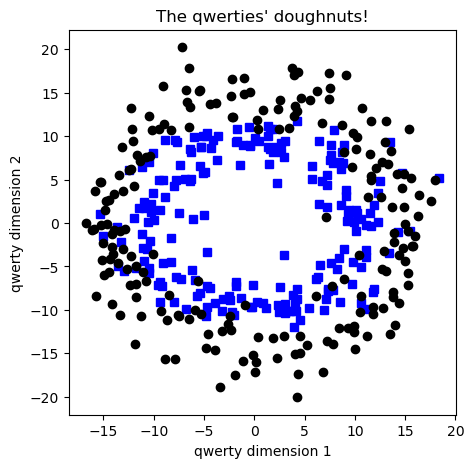

In [12]:

# create data

n_per_clust = 200

th = np.linspace(0,4*np.pi,n_per_clust)
r1 = 10
r2 = 15

# generate data
a = [ r1*np.cos(th) + np.random.randn(n_per_clust)*3 ,
      r1*np.sin(th) + np.random.randn(n_per_clust) ]
b = [ r2*np.cos(th) + np.random.randn(n_per_clust) ,
      r2*np.sin(th) + np.random.randn(n_per_clust)*3 ]

# true labels
labels_np = np.vstack((np.zeros((n_per_clust,1)),np.ones((n_per_clust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)
# convert to pytorch datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)
# convert to dataloader objects
batch_size = 16
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])